In [ ]:
#### Import library ####
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.fftpack import fft2, ifft2

In [ ]:
#### Define Image And Sensor Read Function ####
def read(img_path, sensor_path):
  f = cv.imread(img_path, 0)
  h = cv.imread(sensor_path, 0)

  return f, h

In [ ]:
#### Define Image Show Function ####
def show_image(img, w, h):
  plt.figure(figsize=(w, h))
  plt.imshow(img, cmap='gray')
  plt.show()

#**A)**

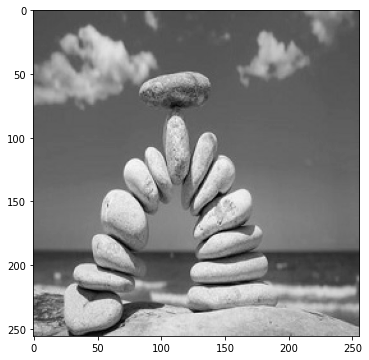

In [ ]:
#### Read And Show Image ####
f, h = read('stone.jpg', '1.bmp')
show_image(f, 6, 6)

In [ ]:
#### Define Degradation Function ####
def degrade(image, psf):
    psf_M = psf.shape[0]
    psf_N = psf.shape[1]
    psf_padded = np.zeros_like(image)
    psf_padded[0:psf_M, 0:psf_N] = psf

    image_dft = fft2(image)
    psf_dft = fft2(psf_padded)

    degraded = np.multiply(image_dft, psf_dft)
    deg_idft = ifft2(degraded).real

    deg_idft = (deg_idft - np.min(deg_idft)) / (np.max(deg_idft) - np.min(deg_idft))
    deg_idft = deg_idft * 255
    deg_idft = deg_idft.astype(np.uint8)

    return deg_idft

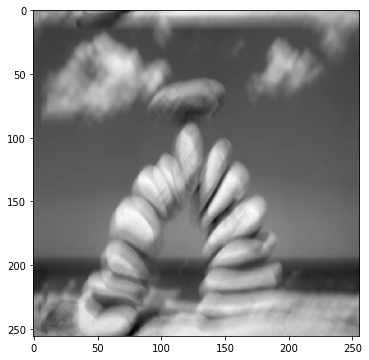

In [ ]:
####    Degrade Image    ####
#### Show Degraded Image ####
g = degrade(f, h)
show_image(g, 6, 6)